In [3]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from copy import copy
from tqdm import tqdm
from timeit import timeit
plt.rcParams["figure.figsize"] = (8,8)

import ipywidgets as widgets

In [7]:
img = cv.imread('lena.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

def gammaCorrection(img, gamma):
    return np.array(((img/255.0)**gamma)*255.0, dtype=np.uint8)

@widgets.interact(alpha=(0.0,5.0), beta = (0.0,100), gamma=(0.0,50.0))
def draw(alpha=1.0, beta = 0, gamma=1.0):
    img_contrast = cv.convertScaleAbs(img, alpha=alpha, beta=beta)
    img_gamma = gammaCorrection(img, gamma)

    fig, axs = plt.subplots(1,3)
    axs[0].axis('off')
    axs[0].set_title('Original')
    axs[0].imshow(img)
    axs[1].axis('off')
    axs[1].set_title('Contrast')
    axs[1].imshow(img_contrast)
    axs[2].axis('off')
    axs[2].set_title('Gamma')
    axs[2].imshow(img_gamma)

    plt.show()

interactive(children=(FloatSlider(value=1.0, description='alpha', max=5.0), FloatSlider(value=0.0, description…

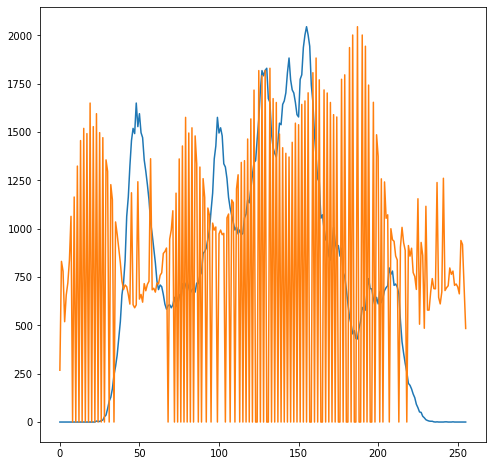

In [12]:
img_grey = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
img_equal = cv.equalizeHist(img_grey)
hist_full = cv.calcHist([img_grey],[0],None,[256],[0,256], accumulate = True)
hist_equal = cv.calcHist([img_equal],[0],None,[256],[0,256], accumulate = True)
plt.plot(hist_full)
plt.plot(hist_equal)
plt.show()

(-0.5, 439.5, 439.5, -0.5)

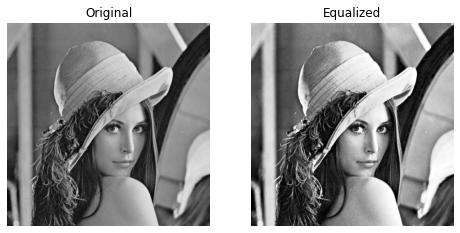

In [18]:
fg, (ax1, ax2) = plt.subplots(1, 2)

ax1.set_title('Original')
ax1.imshow(img_grey, cmap='gray')
ax1.axis('off')

ax2.set_title('Equalized')
ax2.imshow(img_equal, cmap='gray')
ax2.axis('off')